In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [27]:
df=pd.read_csv('price_production_daily.csv')

In [28]:
df['datetime'] = pd.to_datetime(df['date'])
df.set_index('datetime', inplace=True)

In [29]:
df = df.sort_index(ascending=True)

In [30]:
df.tail(20)

,date,price,production
datetime,,,
2017-12-12,12/12/2017,95,1543
2017-12-13,12/13/2017,100,1543
2017-12-14,12/14/2017,95,1543
2017-12-15,12/15/2017,105,1543
2017-12-16,12/16/2017,105,1543
2017-12-17,12/17/2017,112,1543
2017-12-18,12/18/2017,115,1543
2017-12-19,12/19/2017,102,1543
2017-12-20,12/20/2017,102,1543


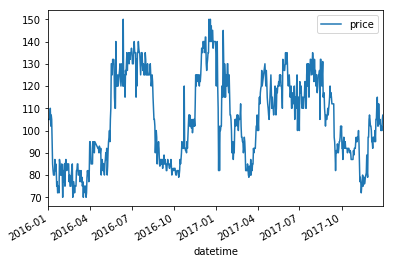

In [31]:
df[['price']].plot()
plt.show()

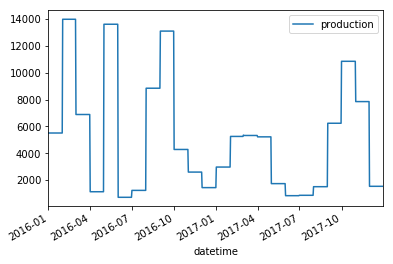

In [32]:
df[['production']].plot()
plt.show()

In [33]:
print(sm.tsa.stattools.adfuller(df['price']))

(-2.816958453575509, 0.05589190750756996, 2, 717, {'1%': -3.439503230053971, '5%': -2.8655794463678346, '10%': -2.5689210707289982}, 4505.915266261803)


In [34]:
print(sm.tsa.stattools.adfuller(df['production']))

(-3.218100620163485, 0.018960562258078476, 0, 719, {'1%': -3.439477677285233, '5%': -2.865568186630048, '10%': -2.5689150720653977}, 11680.875101346912)


In [35]:
model1=sm.OLS(endog=df['price'],exog=df['production'])

In [36]:
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     691.1
Date:                Sun, 11 Nov 2018   Prob (F-statistic):          2.96e-107
Time:                        23:41:14   Log-Likelihood:                -4142.3
No. Observations:                 720   AIC:                             8287.
Df Residuals:                     719   BIC:                             8291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
production     0.0112      0.000     26.288      0.0

In [37]:
df['diffprice']=df['price'].diff()
df['diffproduction']=df['production'].diff()
model2=sm.OLS(endog=df['diffprice'].dropna(),exog=df['diffproduction'].dropna())
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              diffprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5797
Date:                Sun, 11 Nov 2018   Prob (F-statistic):              0.447
Time:                        23:41:15   Log-Likelihood:                -2361.8
No. Observations:                 719   AIC:                             4726.
Df Residuals:                     718   BIC:                             4730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
diffproduction    -0.0002      0.000     -0.

In [38]:
print(sm.tsa.stattools.grangercausalitytests(df[['price','production']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3060  , p=0.0123  , df_denom=716, df_num=1
ssr based chi2 test:   chi2=6.3324  , p=0.0119  , df=1
likelihood ratio test: chi2=6.3047  , p=0.0120  , df=1
parameter F test:         F=6.3060  , p=0.0123  , df_denom=716, df_num=1
{1: ({'ssr_ftest': (6.305984472530482, 0.012252240550085827, 716.0, 1), 'ssr_chi2test': (6.3324061951807495, 0.01185513660935207, 1), 'lrtest': (6.304683337496499, 0.012041942171728708, 1), 'params_ftest': (6.30598447253079, 0.01225224055008327, 716.0, 1)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000015F44CE7438>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000015F44CE7080>, array([[0., 1., 0.]])])}


In [39]:
df['lag']=df['diffproduction'].shift()
df.dropna(inplace=True)

In [40]:
df_val = df.loc[df.index >= '2017-12-24']
df_train = df.loc[df.index < '2017-12-24']

In [41]:

df_val

,date,price,production,diffprice,diffproduction,lag
datetime,,,,,,
2017-12-24,12/24/2017,105,1543,2.0,0.0,0.0
2017-12-25,12/25/2017,102,1543,-3.0,0.0,0.0
2017-12-26,12/26/2017,100,1543,-2.0,0.0,0.0
2017-12-27,12/27/2017,102,1543,2.0,0.0,0.0
2017-12-28,12/28/2017,100,1543,-2.0,0.0,0.0
2017-12-29,12/29/2017,105,1543,5.0,0.0,0.0
2017-12-30,12/30/2017,107,1543,2.0,0.0,0.0
2017-12-31,12/31/2017,105,1543,-2.0,0.0,0.0


In [42]:
df_train.tail(7)

,date,price,production,diffprice,diffproduction,lag
datetime,,,,,,
2017-12-17,12/17/2017,112,1543,7.0,0.0,0.0
2017-12-18,12/18/2017,115,1543,3.0,0.0,0.0
2017-12-19,12/19/2017,102,1543,-13.0,0.0,0.0
2017-12-20,12/20/2017,102,1543,0.0,0.0,0.0
2017-12-21,12/21/2017,112,1543,10.0,0.0,0.0
2017-12-22,12/22/2017,105,1543,-7.0,0.0,0.0
2017-12-23,12/23/2017,103,1543,-2.0,0.0,0.0


In [43]:
pd.Series(df_train['price']).head()

datetime
2016-01-03    105
2016-01-04    105
2016-01-05    110
2016-01-06    102
2016-01-07    107
Name: price, dtype: int64

In [44]:
model3=sm.tsa.ARIMA(endog=df_train['price'],exog=df_train['lag'],order=[1,0,2])

In [45]:
results3.forecast(steps=8, exog=df_val['lag'])[0]

NameError: name 'results3' is not defined

In [23]:
results3=model3.fit()
print(results3.summary())

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [25]:
results3.forecast(steps=8, exog=df_val['lag'])[0]

NameError: name 'results3' is not defined